```
Student-1
Name:Md Abu Hujaifa
ID# 21-45081-2
```

```
Student-2
Name:Md Omar Faruk Sakib
ID# 21-45077-2
```

```
Student-3
Name:Ahamad Safat
ID# 21-45017-2
```



*   Mount your google drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import all necessary libraries.



In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Student Depression Dataset.csv'
data = pd.read_csv(file_path)
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
data_cleaned = data.copy()


for column in data_cleaned.columns:
    if data_cleaned[column].dtype in ['int64', 'float64']:
        data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())
    elif data_cleaned[column].dtype == 'object':
        data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])


data_cleaned.drop_duplicates(inplace=True)

print("Data cleaned successfully.")
print(data_cleaned.info())

Data cleaned successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         2790

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

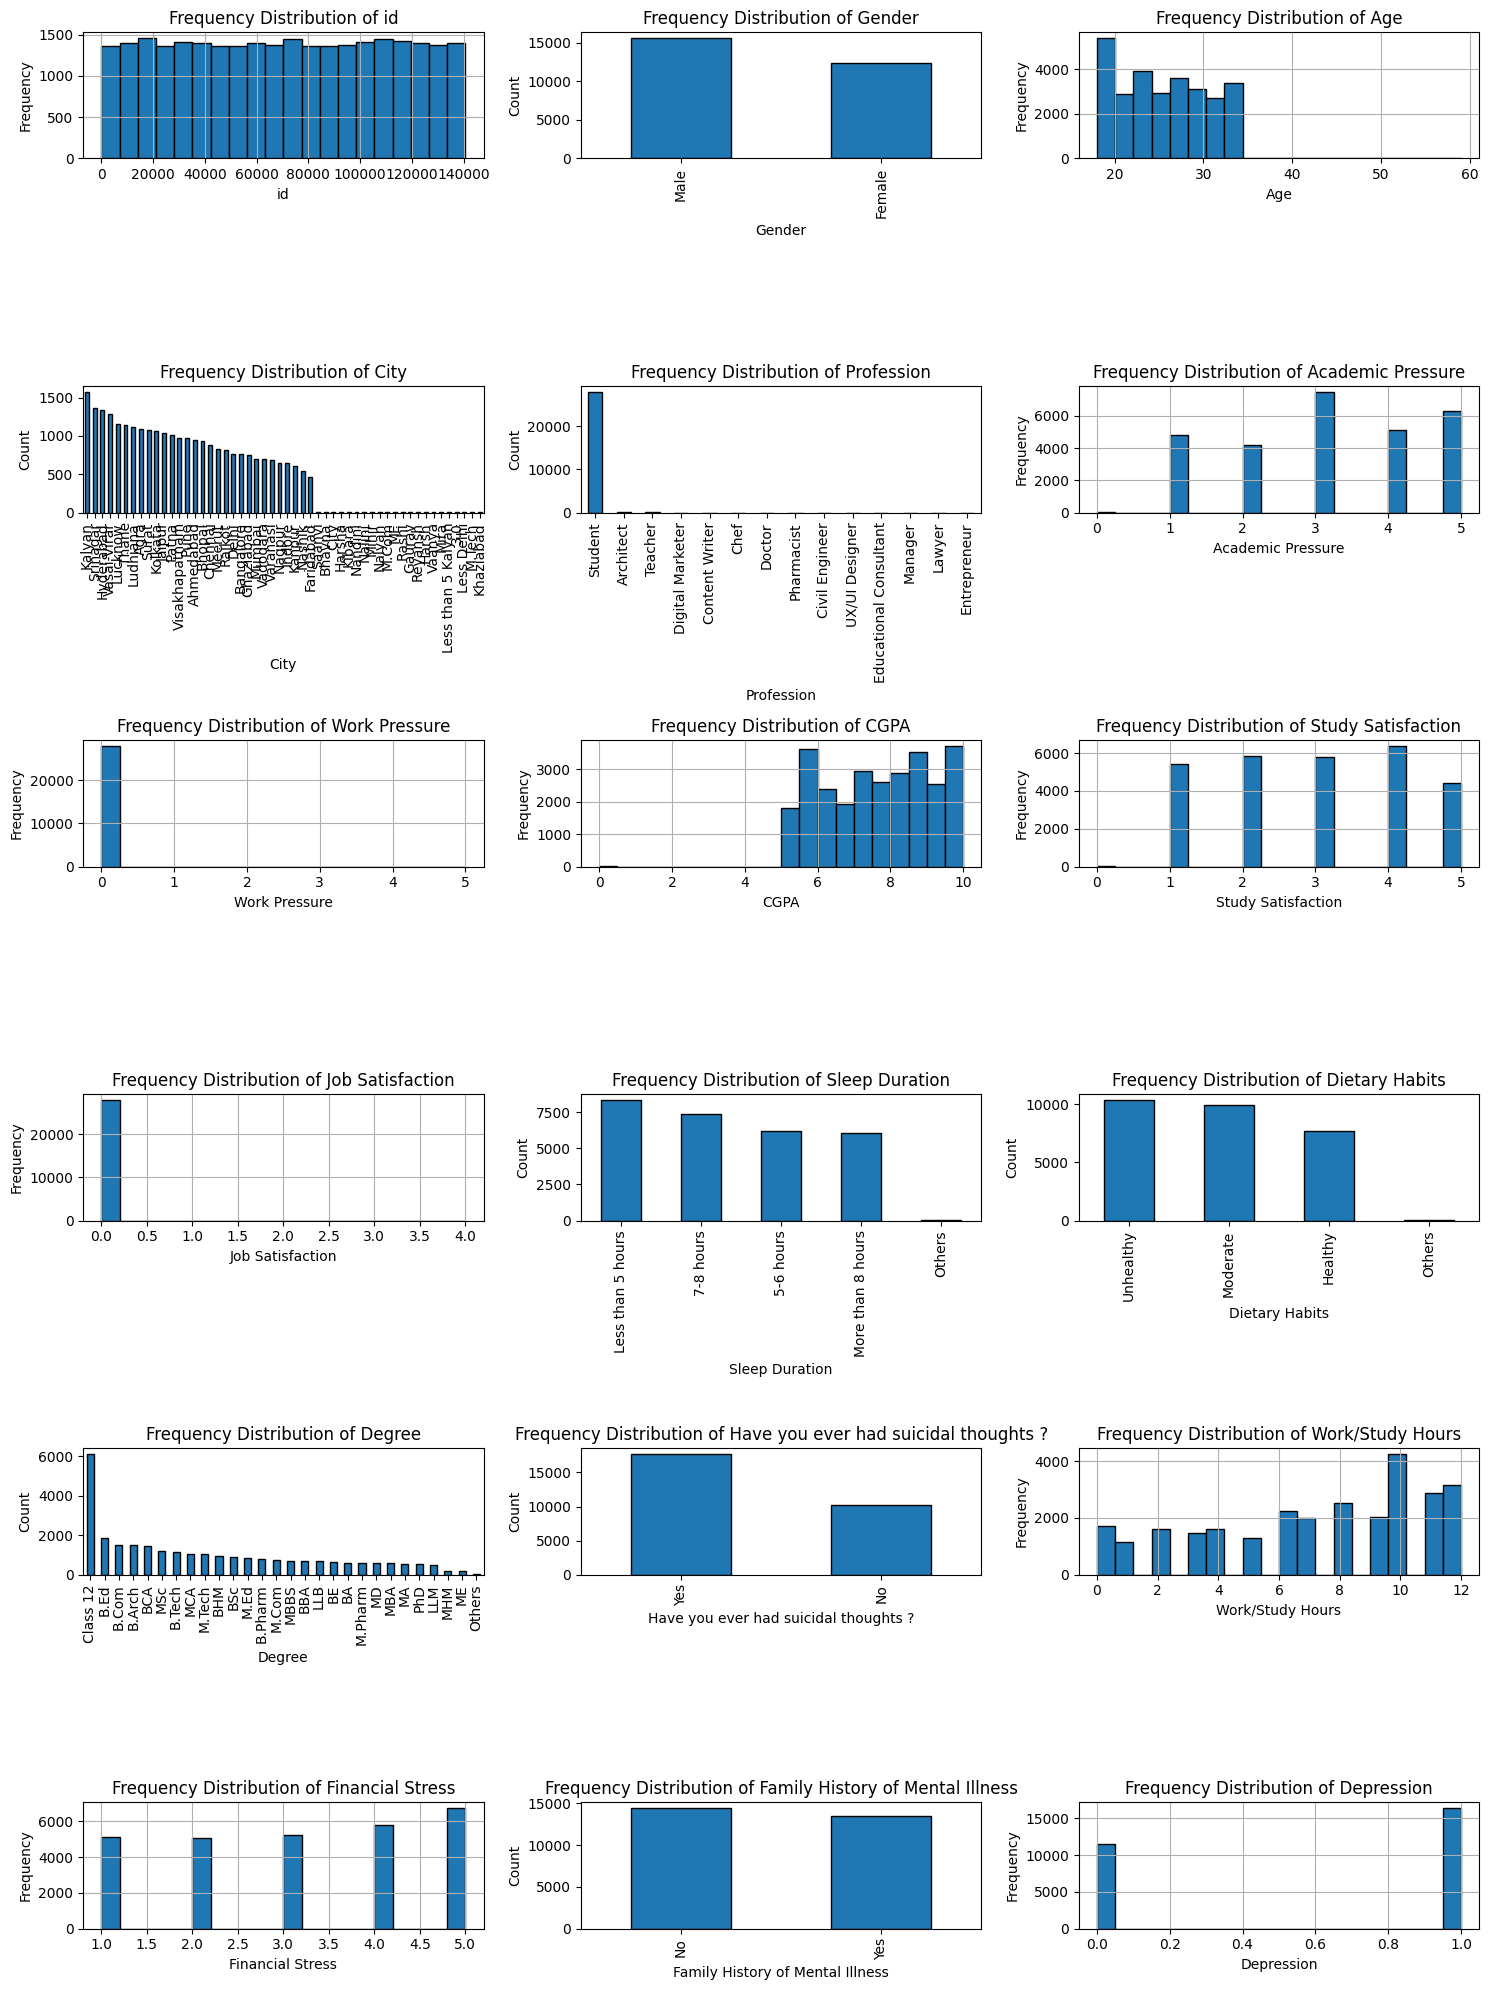

In [ ]:

plt.figure(figsize=(15, 20))

all_features = data_cleaned.columns
for i, column in enumerate(all_features):
    plt.subplot((len(all_features) + 2) // 3, 3, i + 1)

    if data_cleaned[column].dtype in ['int64', 'float64']:
        data_cleaned[column].hist(bins=20, edgecolor='black')
        plt.title(f'Frequency Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    elif data_cleaned[column].dtype == 'object':
        data_cleaned[column].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Frequency Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()



•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [ ]:

scaler = StandardScaler()
data_scaled = data_cleaned.copy()


categorical_columns = data_scaled.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data_scaled[column] = le.fit_transform(data_scaled[column])
    label_encoders[column] = le


num_features = data_scaled.select_dtypes(include=['int64', 'float64']).columns
data_scaled[num_features] = scaler.fit_transform(data_scaled[num_features])

print("Data scaled and categorical features encoded successfully.")




Data scaled and categorical features encoded successfully.


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [ ]:

X = data_scaled.drop('Depression', axis=1)
y = data_scaled['Depression']


y = y.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3241)

print("Data split into training and testing sets successfully.")



Data split into training and testing sets successfully.


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:

svm_model = SVC()
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")


SVM model trained successfully.


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

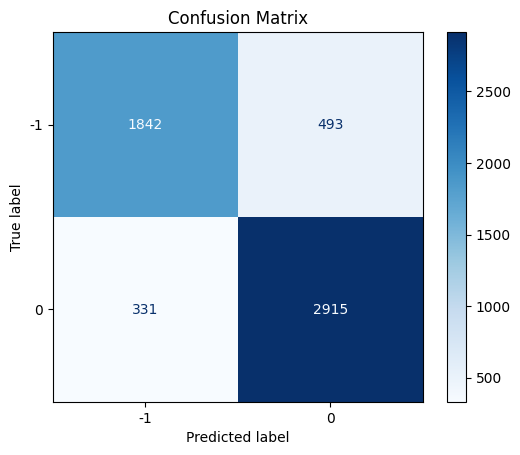

Confusion Matrix:
 [[1842  493]
 [ 331 2915]]


In [ ]:

y_pred = svm_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:\n", conf_matrix)


•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [ ]:

y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


if train_accuracy > test_accuracy:
    print("The model performs better on the training set than the test set, indicating potential overfitting.")
elif train_accuracy < test_accuracy:
    print("The model performs better on the test set than the training set, which might indicate underfitting.")
else:
    print("The model has similar performance on both the training and test sets, indicating good generalization.")


Train Accuracy: 85.65%
Test Accuracy: 85.24%
The model performs better on the training set than the test set, indicating potential overfitting.
